In [1]:
import socket
import sys
import binascii
import numpy as np
import matplotlib.pylab as plt
import math
import codecs
import re
from Area import Area
from Punto import Punto

In [4]:
def introduceAreas():
    numero_areas=int(input('número de Areas: '))#.split(',')
    numero_vertuces=numero_areas*4
    areas=list()
    for j in range(1,numero_areas+1):
        print('coordenadas del área '+str(j)+':')
        user_input = Area()
        user_input.setLimites()
        areas.append(user_input)
    return areas

In [36]:
areas_input=introduceAreas()

número de Areas: 2
coordenadas del área 1:
intriduce coordenada X e Y separadas por "," 1:10,20
intriduce coordenada X e Y separadas por "," 2:20,10
intriduce coordenada X e Y separadas por "," 3:10,10
intriduce coordenada X e Y separadas por "," 4:20,20


coordenadas del área 2:
intriduce coordenada X e Y separadas por "," 1:-10,-10
intriduce coordenada X e Y separadas por "," 2:-20,-20
intriduce coordenada X e Y separadas por "," 3:-10,-20
intriduce coordenada X e Y separadas por "," 4:-20,-10




In [37]:
for e in areas_input:
    for p in e.getLimites():
        print(p.getX(),p.getY())

10 20
20 10
10 10
20 20
-10 -10
-20 -20
-10 -20
-20 -10


In [2]:
# Se crea el socket
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# Se conecta y se comprueba que la conexión se realizó con exito
server_address = ('192.168.0.10', 10940)
print (sys.stderr, 'connecting to %s port %s' % server_address)
try:
    sock.connect(server_address)
except socket.timeout:
    print('Error de conexion')
try:
    
    # Envio del mensaje (000EAR02 - Envio continuo de información de escaneo)
    message = [bytes([2]),chr(48),chr(48),chr(48),chr(69),chr(65),chr(82),chr(48),chr(50),binascii.unhexlify(b"00"),binascii.unhexlify(b"83"),bytes([3])]
    b = bytearray()
    b.extend(map(ord, message))
    print (sys.stderr, 'sending "%s"' % b)
    sock.send(b)

    # Se recoge la respuesta (En este caso la información de lectura del láser)
    num_sens=2
    amount_received = 0
    amount_expected = 4500*num_sens
    print (sys.stderr, 'reciving "%s" bytes' % amount_expected)
    sens=""
    while amount_received < amount_expected:
        data = sock.recv(32)
        #A demas de imprimirse para ver su correcto funcionamiento se almacena en forma de cadena
        sens+= data.decode('utf-8')
        amount_received += len(data)
        print (sys.stderr, 'received "%s"' % data)
    print(len(sens))
finally:
    print (sys.stderr, 'closing socket')
    sock.close()

<ipykernel.iostream.OutStream object at 0x000002045C574C18> connecting to 192.168.0.10 port 10940
<ipykernel.iostream.OutStream object at 0x000002045C574C18> sending "bytearray(b'\x02000EAR02\x00\x83\x03')"
<ipykernel.iostream.OutStream object at 0x000002045C574C18> reciving "9000" bytes
<ipykernel.iostream.OutStream object at 0x000002045C574C18> received "b'\x020010AR02126B28\x03'"
<ipykernel.iostream.OutStream object at 0x000002045C574C18> received "b'\x02111BAR0200000000011110000000000'"
<ipykernel.iostream.OutStream object at 0x000002045C574C18> received "b'00003BB2ED00000000005E005E005E00'"
<ipykernel.iostream.OutStream object at 0x000002045C574C18> received "b'5E005E005F0060005D005B005B005B00'"
<ipykernel.iostream.OutStream object at 0x000002045C574C18> received "b'5A005A005A005D005A005A005A005A00'"
<ipykernel.iostream.OutStream object at 0x000002045C574C18> received "b'5C005C005C0059005900590059005800'"
<ipykernel.iostream.OutStream object at 0x000002045C574C18> received "b'5900

<ipykernel.iostream.OutStream object at 0x000002045C574C18> received "b'50055005600550054005200520052005'"
<ipykernel.iostream.OutStream object at 0x000002045C574C18> received "b'600560056005600560052004C004C005'"
<ipykernel.iostream.OutStream object at 0x000002045C574C18> received "b'6005200510051004C004C004C004C004'"
<ipykernel.iostream.OutStream object at 0x000002045C574C18> received "b'C004C005100510051005100510051005'"
<ipykernel.iostream.OutStream object at 0x000002045C574C18> received "b'10051004C004C0054005600560058005'"
<ipykernel.iostream.OutStream object at 0x000002045C574C18> received "b'D005B005B005B005A0060005D005D005'"
<ipykernel.iostream.OutStream object at 0x000002045C574C18> received "b'B005B005D005D005D005D00560052005'"
<ipykernel.iostream.OutStream object at 0x000002045C574C18> received "b'200510051005100510051004B0051004'"
<ipykernel.iostream.OutStream object at 0x000002045C574C18> received "b'D004D004D004D005100510051004C005'"
<ipykernel.iostream.OutStream object 

In [43]:
#Cadena con toda la información enviada por el láser
sens1='\x020010AR02126B28\x03\x02111BAR0200000000011110000000000000005DA000000000001AA0194019901B902200239023E0224019B019B0208029902AE02CD02E602F503CC04D004FF04CE04FB04FE04F605130573058905B005D305B705BC05A505A605910596059205B804C902EA027F027F02C103E90406040803FC040103C4039D038A033902BC028502DC0341035603560348032703170319030B02CE025A02500252027502B8029E0247023F024C025E02550243024202440297030F030F02E8027D0274027E02E102E602DF02D502D002B5027B026E02680244023C023C025A029E029802750275027502680241023F02500258026B029602A702A802AB02AB02A1029B02880287027B026D025E024B024A024202380220021F02180204020201F801F401E701E001D101CD01C601C001BD01B901B401B301B101A601A0019F0199018F018F018E01850185018501800179017801780175016F0168016201620168016201620162015A01590159015801580146014801480147014301430143013E013E013E013B0139013601350134013201320127012701250121011D011D0119011901180116010A00FE00F700EF00EB00EB00EB00E600E300DB00DB00DD00E000E500E900EE00F000F000E800E000DF00E200E400EC00ED00ED00E400E400EC00ED00EC00E700E500EA00EA00EA00E000E000E800E000DF00E000DF00DF00DF00D600D600D600DE00DC00DC00D300D800D800D000CF00CD00D300D300D300CA00CD00CA00C500C800CD00CD00CE00CE00C700C600C400C200C300C300BE00BE00BE00C200C600C600BC00BC00C300C300BA00BA00BB00BC00BA00BB00BC00BC00BC00B500B500B300B300B300B700B700B600B300B700B700B600B000B700B700B000AA00AA00AA00AA00AA00B100B100B100B200B200B100B100B100B100AC00AC00B100B100B100AC00B100B100AC00AC00AC00AC00AC00AC00AC00AC00A800A800A800A800A800A0009F00A800A800A200A200A000A000A000A800A000A000A0009F009D0097009F00A000A000A0009F009700970097009F009F009B0097009700A000A000970097009700970097009B009B00A0009B009B0097009B009B009B00950095008E00920097009700940091008E008E008E008E009200940094008E008F009200930093009300960094009400940094008D008D008D008E009200970098009000900090009100910091008D008F00900090008C008C009200920091009100880088008D00900090008F008E008F009700930098009800950095008D008E008B008B008E0091008D008F008E0092009200940094009700970097009700970097009700920092009200970092009700970095009F00970097009700A000A000A000A000A000A000A000A000A000A000A000A000A000A000A000A0009B009F009F009F009D009D009F00A000A000A000A000A200A200AB009F00A0009F009F009F009F009F00AB00AB00A400A800A800AB00AB00AC00AC00AC00AC00AC00AC00AC00AC00AC00A800A800A800A800AB00AB00AB00AF00B400AF00B200B400B400AD00AD00B200AB00AB00AF00B900BA00B900B500B600B900B800B500B400B500B800B800BF00B700B700B700BE00BD00BE00BD00BD00BD00C500C800C800C400C400C700C700CD00CD00C700C600C600C500C700CF00CF00C700C700CE00CE00CE00CE00D300D300D600D600D000D000D000D600D600D600D600D600D600DF00E000E000E000E900E900E900E900E600E600F400F400ED00ED00F500F800F800F800F100F800F800F800F800F200FB00FC00F500F500FD00FE01060107010B010E010E0107010B0116010F01140116011D011D012301230121012101250125012D012D012D01290129012D012E0139013401330136013E013E013C013C014001400148014E014F014F01520152015301570157015A015A015C0161016701700176016F016B016B016E01700170017B01790176017901840188019901940194019401A001A201A601AF01AF01AE01AF01C401C401C301CA01D501D601DA01E601EE01EF01F90206020F021102260234023E02500250025B026B0284028A029702AD02BC02D802FA03060315032903410355036303760370036F036F036E036D036E0370036E03680361035E0348034502C1021D01D401D201F0026D02DE02E902DD02CA02B202A2024E01830148011600FB00EE00E700E700E600E800E700E700E400D500DE00DC00DB00D500D500CF00DB00D300D100CF00CD00C400C400C900C400C400BF00BF00BA00BA00C200C100BF00BF00BE00BD00BD00B500B400B300AA00AC00AC00AC00AD00AD00AC00A500A500A5009C009C00A200A500A5009F009F009F009F009F00980098009C009A00A100A000A0009D009900970099009900960092008C008C008D008D008C008C008C008D008D008D009600960096009600970097009700960092008E008D008D008E008E008F008F008E008E0089008900890089008E008D008C008C008C00840089008900890089008C008C008A008A008A008A0089008A008A008A008A008A0086008A008A008A008B008B008200820082007A007A007B0084007B007B007B007B007C007C007C007C007B007C008100810081008100810081007E007E007E007E007E00840084007E007C007500730071007300730073007500750075007C007C00780078007700760071007100680068006800680066006B006C006C006C00710071006C006C006E006C006C00680068006800680068006B0071006B007100780078007C007C00780076007400740079007B007D0083008A008B008A008800880089008B008B00900090008D0088008F00C50140017F01B601EB021B027102F0044D047C048804A204AA04B2050605CA0ADC0AF20AF2066606660C960CE20CCC0BEF0BED0BF40CDA0CF50CF50CEE0CEA0CE10CDA0CD70CCC0CC80CC00CC00CB10CA20CA10C9D0C8E0C8B0C810C780C8A0CB10CC20CEB0D110D430D4306B706AD0641064306350623062406270627062E06380636063C06350662AE78\x03\x02111BAR0200000000011110000000000000005DA1E0000000001AA0188018801BA021F02410241022F019301930219029C02BA02CE02E7030703CE04C604F704CC04FD04FE04F20513056C058E05B805DB05CF05C505AC05AF05900596059105B904D502E3027A027A02DA03DD040603FE03F203F203C2039D0390033102C1028E02E6033F034C03540349032203160316031202C0025A02490249027F02AF02A7024C023B023E02580258023F023F02420293030E031002E902850278027E02D002DD02DB02CC02CA02B6027302720271025102410241025C02A7029202750275027E0268024A02440250025E026802A102A902A902AC02A6029B0292028D028402730264025A024B024B022E022902200218020A020101FE01ED01EB01E701E301D601D201C801C301BC01B801AA01A901A4019701960196019F019901990189018501850185018401800180017901760172016C016C016901670160015D015801560156014F014F014D014D0149014D0147014701450140013C013B013B013A013B0139013B013901390135012F012F012E012E0125012501250124011D01160111010300F700EF00EE00EF00E900E800E500E000DD00DD00E200E600E900F100F100EB00E100E100E100E300EA00EE00EE00EE00EE00EE00EE00EE00EE00EE00EE00E300E200E100E100E000DE00DE00E000E000E000E000E000DC00D700D700E000DF00DC00D500D300D300D300D300D300D400D100D400CE00D400D400CB00C600CB00C600C400C600CE00CE00CE00C800C800C100BF00BC00BF00BF00C000BB00BB00C300C500C400C400BC00BC00BC00BC00BC00B400B300B500B500B500B400B100B100B200B200B400B800B200AF00B000B700B300B400B400B400B400B400B400B400AC00AC00B100B100B100B100B500B100B100B100B100B100B000B100AE00AE00A900A900A900A900A500A500A900A300A000A000AC00AC00AC00AC00A300A300A300A100A500A300A300A900A300A100A0009800A300A300A100A100A100A100A100A100A100A100A10098009500A000A000A000A000A000980098009C009C009C009700970098009800970097009400940097008E0095008E009500950095009000900090008C008C0095008E008C008C009300950093008F00930097009700970095008D008D008D008B00860090009000900091009800910099009100910092009200910091008800880089009300930093008A008A00910091008D0091009100910091009800980097008F008F009500950091009A009A00940094008B00960095009300930097009700920090009500970097009700930093009300920093009800980098009800980098009C009C009800980098009C00A10098009800A100A100A100A100A100A100A100A100A100A000A000A100A100A000A000A0009D00A100A900A900A900A900AC00A900A900A300A100AC00AC00AE00A900A900A900AC00AC00A900A900A500A500A900A900A900AE00AE00AE00AE00AE00AE00B100B100B100B500B500B500B100B500B500B500B500B500B500B500B500BB00BB00BB00BA00BB00BA00BA00B900B400B900B900BF00BF00BA00B700B700B500B500B700BE00BF00B600B600C600C600C600C600C500C500C600C900C900C900C400CC00CC00CC00CC00CC00CB00CB00C800D000CF00CF00CD00CF00CF00DA00DA00DA00D400D400D300D700D800DD00DD00D700D700D800DE00DE00E100E100E900EA00ED00F100F100F100F800F800F100F100F100F100F900FB00F900F200F400F400F600FD00F900F900FB00FD00FE00FE01060108010D010F010B011601110111011D011D011D011A0125012501220125012B012B01250125012D012D012D012D012D012E0133013E013E013601360142014101400148014801480145014D014D0155015701570157015C015E0160015F015F0166016A016B016C016B017201720172017B0178017801780185019201930192019D019F019F01A501B401B401B701B801B801BD01CA01CA01D201D501DD01DE01E801F801F801FC02050210021B02270237024402470260026902700286028A029B02B302CA02DF02F8030E031903330342035A036A0386038603710370037003700371037103690364035F035A0349034402C2021F01D401D401F2026402D602DD02D602CA02B202A4024201930140011E00FF00F200F000F200F200F200E700E000E000DD00DD00DC00DF00DB00DB00D800D400D300D200D000D000CA00CD00CD00C400C400C400C400BD00BB00BE00BE00B800B800BE00B500B200B200B600AD00AC00AB00AB00A800AE00A500A500A500A500A500A500A500A5009F009F00A300A400A400A400A500A500A5009A009A009A009700A3009E00970097009700980098009500980095009500950093009600990097008E008E008E008E008B008B008F008E008B008B008C008F008F00930092008A008A008E008E008A008A008A008B008B008A0085008B008B008D008D008E008E008700860086008A008D008F008B008B008C008C008400860086008300820082008200800080008000800080007B007C007C007C0085007C007C007C0080007D007D007D007D007D007D008600860086008200830083008300830083007E007E007E007F007F007F007F007F007F007D007D007D007D00790079007900760076007800770072007700740072007200720072006F00720072007200720077006D00720072007200720072006D007200720072006D00690072007200790079007D007B007B007B007B0075007400740074007E007F0088008F008D008500850086008B008B0087008500830083009000DB014A018E01B501E9021B0273031904420473048B04A104AC04BD04E205D10ADB0AF30AF3065D065D0C910CEE0CD50BEC0BE00BEC0CD70CFB0CF40CF30CEE0CDE0CD20CD20CD00CC90CB90CB20CAF0CA20C9C0C940C800C800C800C790C820CAE0CD20CF50D1E0D3F0D3F06BC06B40638063F062E062106270629062A062F06310636063D06470661554A\x03\x02111BAR0200000000011110000000000000005DB240000000001AA0188018801BD02230239023F022C019B019B020802A102BE02D402E402FF03D704CE04F504D604F804FC0501052D057B058505C605DA05BF05CA05A405B1058D059D059405C004CD02ED0286028602B503E903FB03F2040403F103BE038F038A032B02AD02'
sens2='\x020010AR02126B28\x03\x02111BAR020000000001111000000000000000C134A00000000010E010E010B010C010C010C010B010B010C010C010C010B010A01040106010901060107010701070107010201000100010001000104010501050102010201020102010100FE00FD00FC00FA00FA00FC00FC00FA00FD00FC00F200F200EF00EF00F000F300EF00EE00EE00F000EF00EF00EC00EC00EA00EA00EA00EA00EA00EC00EC00EB00EB00EC00EC00E900E900E900E900E900E800E800E800E900EA00EA00EB00EB00EB00E700E800E800E600E600E600E600E600E800E600E600EA00EC00EC00E800EC00EA00EA00EE00EE00EB00EA00EB00EB00ED00EC00EC00E900E900EB00EB00F000EA00EC00EF00EC00F000EF00EF00F100F700F700FD00F200F200FC00FC00FE00FE00FC00FA00FA00FA00FA00FA00FB00FF00FC00FC00FF0101010201030100010001020102010901090109010301030107010A010A0109010B010B0108010C011201130111010F010F011001120110010E010E0111010E010F01110115011301130117011801150115011501170118011C01200120012001200120011C011C0120011F011F011F011F012201200126012601270124012401260126012A0126012C012C0128012A012D012F012F012F01310135013401370133013701370137013901330133013301350135013301350139013B013D013F013D013D013D0141013F01410141014001430145014501410141014801470148014B014D014D0153017B01BA027B03240350037203B203D203E803FB0402040203FE03FD03EB03EB040B040B040C0426043A045704C204D804DC04F0053A053A04C604C6054C05560556055B054B04EC049D0490049204850468044B042C04380436044F046304730474047604760470046E04610465046C0469045C043F0435043D045D0462043D03DC03C103B603AB03AB03AB03AA03B003CE042A0449044A0440043104470445043E04340444043A04450438042D0429042D042404210423041D042104260420042604140414042804170417040D0412040B040503FF03FD03FB03FD03FF040103FB03FB03FC03FC03FC03FD03FD03F303F703F503F703F203F403F003E703E703ED03EE03F3041304100421042F043B044704D305B105F6062B06CA06CA06B106B706DB06D006D006F30708070E071007170719071B07220733073A073E075106EE06D306D906D906DF06DC06E506FB0660065F06980746077F070607A907C107CA07E407E607BC045D038C036F036F036F036E036903630362036903690369036C037003690365035A035D035D035C035C035603510357036D03C2044008220557048A042903FC0415053D056B05620567056605610569056C056F057B057F05830493042304A9059D05A305A505AC05B505B905C905CA05DF05F305FA06100633071709DA0A670A620A5D0A530A500A430A3B0A350A210A0D0A0D0A0D0A0809F209E709E709E709EC09FB0A0C0A1D0A110A0B0A0009F209EA09FE0A050A1D0A260A600C5E0CF60D1B0D480D830DBB0DC10DC10DB60BF90B900B7E0B780B730B6F0B6C0B6A0B6A0B640B5F0B5F0B5D0B5A0B590B530B530B500B500B4A0B4A0B480B480B460B430B430B400B3E0B3D0B380B3A0B360B360B340B470BA80BA80BA30BA10BA00B9E0BA00B9E0B9E0BA00B9E0B9D0B950B980B980B990B990B980B980B970B970B970B990B990B8D0B8C0B940B940B990B990B9B0B9F0BA00BA80BAA0BAA0BAA0BAE0BB00BB10BB00BB00BB40BB40BB40BB80BBC0BBC0BBC0BBC0BBE0BC20BC20BC20BC50BC70BC90BCB0BD10BD10BD20BD60BD80BD90BDD0BE20BDF0BE10BE30BE90BED0BF20BF50BF60C020C040C040C040C080C0C0C0E0C100C120C180C180C1C0C1D0C1D0C1D0C220C220C250C2B0C2F0C310C3A0C3A0C3A0C4E0C530C5C0C610C630C630C700C720C740C800C800C880C8B0CC40D070E650E670E6C0E7A0E7B0E860E8B0E8E0E940E9402AD0298028C027D0277026E026602620256025D025D025A0252025A025B025B0258025202510245024502460244023E0238021201EA01D601B501970190017E017B0174016F01690169016B016F016F016A01680166016601640160015A015A015A015401560156015301530150014F015001500150014D015001500154015401540154014F014E01490149014701520149014B014D014E0146014E014E014E01490149014E014E01510150015201540156015601560158015A015C015C015C0160016601680168016C018301A001CA01CD01D101D101D101CD01C701C001BA01AF019C019C019D01A301AB01AF01C001CD01DC01E801EE01EE01EF020D021102130210020B020B0211021302130227022C022902240226022A022F02310235023102340234023602380251025502540254025B025E025E027302730286029102A202E002E202FC03820389039E03C703ED03FF0415043C0455044D03FC040B040B03BF03C303B4038A03720355034B034B03470320012A01120112011301130115012301230127012D01DC01C401A701AA01AF01BA018E015201290125011F011E011E011A011C011C011C011E0126012701270134014101430147014001370133012E012E01240123011E011E011F011B011F011C011B0117011E011C011D011D011E011E0117011701180119011C0119011C011B011B011E011B0118011B011701170117011B011B0119011A011B011B01260133011E011C011E011E0123012901310137014501450141013E013E013E013E014401420142013F0143013D01430141014101430141014501440144014401460142014F014C0147014501490149014C01450145014701470147014C014F014F014F014F014C014B014C014F015101510152014C014C015101510150014E0149014E015101510150015001510151015701580158015801560158015C015E015E01600161016101670167016C017401A00204021802190219021F021C02150213020B020602040203020101F501EE01EE01E801EA01E601E101CB01C901CA01CA01D901FD028E9873\x03\x02111BAR020000000001111000000000000000C136700000000010E010B0109010901090109010C0108010401040108010501050104010A010A01090102010201060108010201020102010201020101010000FD010201020102010200FE00FE00FC00F800F800FA00FD00FD00FD00F900FB00F500F500F700F500F000EE00F000F400F400F400EE00EC00EC00EF00EF00ED00EC00EB00EC00E700E700E700E700E700E800ED00E800E800E500E800E300E300E800E700E800E800E800E800E800E900E800EA00EA00EA00EA00EA00E500E700E700E700E700E700E700E700E600E700E700EA00E900E900E700E700EB00EB00EB00EB00EA00EA00EA00EE00EE00EA00EE00EE00F000F000F400F400F400F400F600FB00FD00FD00FD00F900F700F300FA00FB00F900F900FC00FC00FC0101010100FD00FA00FC010101010108010A010A010B010B010B010C010A010A010A010C010C010C010E010B010B01090108010B010B0109010E01120115011501150113011301130114011501150115011701170119011901190117011701170117011A011A01170119011C011D012001210122012201220124012401240125012801270127012D012D012B012B012B0129012901290129012F012F012F01310133013701330131013101330135013701370137013701390139013B0136013D0139013B013B013C013B013E01410142014301430143014301490144014501440145014901470147014A014D014E0152017B01B8027B03200359037403B803D603F504020402040203FF03F903F903FD0404040B04130421043E046004D304DC04DE04F4053A053A04D704D7054F0555055505580555050C049E0491048D047F046C0448042F041B0439045A04590466047004700469046C046A046A04670463046C045F0435042D043C044E0458044203E303BD03B203A603A203A603A803AC03E20429043C043F04430443043B043B0436043604370434043604370438042F0435042B042D043204290422042404220421041E0410041404180427040D040C040704030400040A03FC040103FF03FE03FA03FE0400040403FD03F903F903F903F303F303F003F003EE03EC03E603E703EC03EE03EE040A04120421042E043A044B04C805AB05F7062A06C606C606B006B206DD06DD06DD06E806FE0705070B070F0714071A071A07260736073A074706F006D206D406D706D506D806EC06F60662066206AA073C0786071107A807C307CC07E907E907B6045803870375036D0371036B036A036303640364036B037803780378036F0361035F035C035C035C03570351034C034C036203C3043E081A056A047D042103FA04110539056B05610567056A0555056C056D0571057A05880583048A042C04A80598059F05A505AC05B305BB05C705D005DC05EB060106120624072A09EE0A720A620A5F0A560A500A430A3A0A330A250A0A0A0C0A0C09FF09ED09E709E109E409EA09ED0A0B0A1F0A0A0A040A0409EE09EF09FD0A090A1B0A200A510C560CEE0D190D510D8B0DC80DCB0DC40DBD0C060B920B810B7A0B730B680B670B670B620B620B5F0B5D0B5F0B5D0B590B590B560B530B4E0B470B470B480B460B440B430B400B440B430B3E0B3D0B390B380B3A0B430B460BA40BA40BA30BA10BA10B9D0B9D0B9D0B9B0B9B0B9E0B9B0B970B9B0B9B0B970B940B950B950B950B950B990B950B940B890B890B950B960BA00BA00BA00BA20BA50BA50BA60BA60BA60BAC0BAE0BAE0BAE0BAE0BB00BB00BBA0BBB0BB80BB60BB70BBB0BC10BC10BC30BC70BC70BC70BC90BD10BD50BD90BD90BD80BDB0BE10BE10BE40BE50BE70BE90BEB0BEF0BF30BFA0BFC0BFD0BFD0C010C040C060C0C0C0B0C0B0C0B0C140C150C180C180C180C220C250C280C2B0C2F0C350C360C3A0C3F0C470C490C520C5B0C5D0C5D0C660C6C0C760C7A0C800C840C860C970CC90D0C0E570E660E660E740E790E830E880E8E0E910E9102A10290028402790270026D02620258024D025002500256025A025B025B0255025402500250023F023F0244024402420235020F01ED01CA01B5019B018E017F017E017901790173016A016A016A016B016B016701670162015F015F015F015E015E015B015B0157015701570156015301550155015201520152015301530151015501520151014D01470149014701450145014501460148014801490149014C014D015001500152015001500151015101520154015401550158015B015B0161015F01610164016A016E017A019801B901CE01CE01CE01CD01CD01CB01C601BD01A0019F019B019C01A001AA01AD01BD01CD01D701DB01EB01F101F2020C021002150215020E020A020E02130213022A023802350230022B022A022B022B022D022D02310231023402360251025102500254025C02610265026D02790281029302A002D802DB02FA037F039303C003D003ED03F803F803F804140442041F040A040403D70398038003800373035A035C035C034A03350126011501090109010D0114011401230126012B01EB01CC01A701A601B101B6018C0154013301260120011F011E011F011F011F011F012401260126012601360142014701470144013C0138013301310129012501240120011E0125011F0124011F011F011F011C011F011F011E011B011B01190119011901180118011801180118011B011B011E0120011E011E011E011E011B011B01190119011E012F012F0129011F011A0117011B011E01290136013E01430143013D013F013F0140014401450145014301450142014401440147014901470148014701470147014A014A014D01470145014501470147014701470147014B014E014E014B014B014B014B014B014E0150015101520152014E014E0154015A01560151014A014A014B0150015301530154015401540156015801580158015B015D015D015B015D015D015D01640161016101670169017901A301FB02170217021C021F021F021202120211020B02060202020001FA01F701F701F301EF01E301DE01CC01C701C701CE01D6020502959B1C\x03\x02111BAR020000000001111000000000000000C13A10000000001100114010E010E010E010B010B010901090109010C010D010A010D0109010B0109010901010101010100FF00FB00FB01010105010301060106010801060106010000FF00FD00FD00FF010300FA00FA00FA00F900F900FB00FD00FD00FC00FB00FA00F800F100'
sens3='\x020010AR02126B28\x03\x02111BAR0200000000011110000000000000023C1E200000000010A010A01090109010A010A010A010901090105010501050106010501040108010801040105010501030103010301030103010301030104010400FD00FD00FD00FD00FD00FE00FD00FD00FD00FD00FD00FB00F900F800F800F900F900F600F900F900FA00FA00F500F500FC00FC00F600F600F200F200EF00EF00EF00EF00F100F100F400F700F000F000F000F000F500F500F600F300F000F000F000F000F000F000F000F200F300F300F300F500F200F600F600F600F300F300F500F500F100F200F100F100F000F400F400EE00EE00F400F400F300F300F500F800F700F700F700F200F100F700F700F700F600F600F500F600F600F600FA00FD00FE00FE00F900FE00FD00FA00FD00FE00FE00FE00FE00FD0103010401050105010300FD00FE00FE0103010301030103010301040103010501080109010801080108010801050109010901060105010601060109010B010D010901090112011201110112011501130112011201120116011501160112011201190119011901190120011D012001200121011E011E011E011E011E011D011E01200120011D011D0121012201240126012201240127012B012B012A012A012A012A012B0130012B012B012E01300132013001320132013501350135013801380136013601360136013601360136013A013F013F013F014001440144014401440144014701490149014A014E014C014D0150017601AB0260031303310343039F03D603E403F303F3040203FF03F003EC03EC04050405040D041B043E046C04B204D404D404FE0531053104C004C0053B055A055C055C055C050404A0048D04870481045C0447042C0418042C0445045904590462046B04650469046B046104650462045E044E04250426042E0455044B042D03CE03B403A003970397039F039F03A103CE0435043E043F0442043E043504200433043604230427042C042D041F04230423042D0427042E0425041404160415041404160407041404120402040E04150409040303FA03FF03ED03FC03FC03F903F903F503F603F603F503ED03ED03E503E503E503E903E903E503E203E203E203E203DF03E204020413041C04170432044704BE05A905F6061E06C406C4069906A306DB06CD06CD06E706F40700070A0713071C07230728072E0731073F074606EB06D006CA06D106E206E006F00701065B065B06A6072C07750704079607B307C907E807EC0788045D0395036F0370036B036303610361036103720372037203760376036903610357035D035E035E035803540358035A035E03AB042107FF0561047F041B03FA040F052205650567056C056C05620565056B056C05700576057D04A6041E04AC059D059E059C05A905BB05B405C005D905E005ED05FA060F0628070009370A620A5E0A550A4F0A420A3D0A360A360A1D0A090A0E0A0F0A0E09FD09F009EC09E109DE09EF0A0F0A230A230A0F0A0D0A050A030A000A030A170A240A4E0BFC0CE70D140D3F0D7A0DA70DB90DB90DB50BFB0B890B790B700B700B6F0B650B620B610B610B5F0B580B570B580B560B500B500B500B500B490B490B440B430B440B450B450B3E0B3E0B3A0B380B380B3B0B3B0B3B0B440B970BAB0B9F0B990B950B950B980B980B940B920B980B950B940B950B940B940B940B910B940B910B930B930B930B930B820B820B880B920B930B930B950B980B980B9C0BA30BA30BA80BB30BB40BB50BB50BB80BB80BB90BBA0BBE0BBC0BBF0BBF0BBF0BC60BC60BC60BC90BCC0BD10BD60BD60BD10BD10BD70BDC0BE00BE00BE30BE70BE60BE80BE90BF00BF10BF80BFB0BFB0BFE0C050C090C0D0C0F0C100C160C160C130C150C1D0C210C200C210C280C2C0C2C0C330C390C3C0C3E0C4A0C500C560C5E0C690C690C710C760C770C790C7F0C810C8E0C900C920C9D0CB80CF70CF7022702220222021B01DD018C0150013F013D013F013701320122011C0118011701180116011701170117011501150119011901130112010C0109010901010103010300FF00FD00FC00F600FA00FD00FB010001000101010000FC00FB00FB00FC00F600F600F800F600F200EE00EE00EE00EC00EC00EC00EE00EE00F600F600F300F000EF00EF00E300DE00D700D200D200D200D200D100CF00D000D300D300D200D000D000D000D100D100D000D000CE00D100D500D700D700DE00E000E000E200DF00E500E900E900E800E800EA00E900EC00E900E600E100E100E100DE00DE00DA00D100CE00CE00CE00CE00CD00CD00CD00CE00CE00CF00CF00D600D500D400D400D700D500D400D400D500D700DD00DD00D000D000CA00BB00BB00B800BB00BB00B800B800B900C100C500CF00D000CF00D300CF00CE00CC00CA00CC00CE00CE00D400D400D500D800D800D300CB00CB00D100D100CF00CF00CC00CC00CC00D200CC00CC00CA00BE00BA00BB00BE00BF00BE00BD00BB00B800B700B700B800B900B800B200AE00A900A600A400A600A700A400A400A1009C009500950097009C00A000A100A400A600A400A400A700A700A400A400A900A900A900A800A800AB00AB00A900A900A900A900A900A700A700A400A400A800A800A1009D009C00A100A100A100A1009F009F009F009C009F009C009B00980098009C0098009C009C009C009C0095009700970098009800970098009A009A009A0098009800940094008F0095009500950095009700970098009B0098009700980098009A0098009A009E0096009600990099009A009A009B009B009900990097009900990099009C009C00960096009700A300A200A400A700B100B100B200B400B900B800B800B400B200B200B200B200B200B200B200AE00B200B200B500B500B900B900BB00C000C000C100C400C400C400C100C100C200C100C200C100C100C100C400C400C400C400C200C500C300C300C200C400C400C200C100C200C400C400C800C300C400C400C500C900C400C100BE00C100C200C100C100C100C100C400C100C400C400C500C800C900C900CDE7C2\x03\x02111BAR0200000000011110000000000000023C1FF0000000001080108010301070103010301070103010201020104010101010101010100FD00FC00FC010200FD00FD0102010100FC00FD01010101010100FD00FF00FF00FF00FD00FD00FB00FB00FB00F700F800F800F900FD00FD00FD00FA00F800F800F900F900F300EE00EE00EF00F500F400F400F400F100F200F200EE00ED00ED00ED00EE00EE00EE00EE00EE00EF00F000F000F300F400F000F000F000F200F200F500F000EF00EF00F400F400F400F000EE00EE00EE00EF00F000EE00EE00F300EF00EF00EE00EF00EE00F200EE00ED00EE00EE00F100F100F100EC00F000F000F100F500F500F400F500F400F400F400F500F500FA00FA00FA00FA00FA00FA00FC00FB00F900F900F900F900F900F900F900FB00FD00FE00FE00FE00FE00FC00FC00FC00FC0101010101070107010201020101010101020103010201020102010301030103010301070108010801070108010C011101080108011D010D011201120110011201120113011301120113011401180118011701190119011901190119011901190119011D011D011D011E011D011E011D011D0122012201220125012301220122012601260126012601260126012901280128012A01300130013301300130013001310131013101310136013601380136013501360136013F013F013F013A013F013F013F013F013F013F013F0140014901450149014901490149014A014B014F0158017A01B30261030803310350039803D703EE03F50406040003FF03FF03F203F2040404040406041E043E046304BE04CF04D504FE053C053C04BB04BB0552055205540554055004FB04A6048B049C04860452044B04230422043D04510452046A045E046E044F044C04700469045D045D0461044F042E0421041404540451043003C503B503A10396039C039D039D03A103D604280448042C044304420434043A04260436042C04350423041F04200432041A0425041B041F0413040F041404270413041A04030413040C040203FC0408040303FD03FD03FD03FD03FC03F303F303ED03ED03EE03EE03ED03F003EE03ED03EB03EB03E903E903E903DF03DF03DF03D603DA03DC03F9041004230424043D044904BD05A705F9062106C206C206A306A306DA06D406D406E90700070607090717072507260727072B072C073F074D06ED06DD06D206E106E206E206E90701065706570699072607710709078C07B707BD07E007E407AF044303860369036803630363036103610367036D036D036D03750375036F03560356035F035E035E034F034F0354035A036003B4041C07FA05540472041703F8040305250561056605690568056605710565056E0571056F058104A1042904B5058E059E05A205A405AE05B205C405D105D205E605F4060A062A06FC09580A630A620A550A4D0A450A440A3D0A380A210A090A0A0A140A140A0309FB09ED09DD09DD09EC0A170A260A260A110A0A09FF09FD09FE0A030A240A300A570BF70CE70D120D450D7A0DA70DBE0DB80DA40BF60B8D0B760B750B700B6A0B660B660B660B5F0B5F0B5B0B580B5B0B560B560B530B510B4D0B4B0B4D0B440B430B430B430B430B3F0B3F0B3B0B3B0B380B3D0B3D0B3A0B3E0B990BA50B990B990B990B990B990B990B990B990B990B960B940B940B950B950B940B920B920B960B960B920B930B900B860B860B8A0B8F0B930B930B980B9D0B9D0BA30BA80BAB0BAB0BB00BB30BB40BB80BB90BB90BBD0BBD0BBD0BC70BC40BC30BC30BCB0BCC0BCC0BC80BC80BD10BD40BD20BCE0BCE0BD30BD90BDB0BE30BE50BE80BEA0BEA0BF00BF10BF60BFB0BFB0BFE0C000C000C040C090C0B0C0D0C110C140C160C1C0C1D0C250C250C250C2A0C2A0C270C300C330C3E0C490C490C500C540C620C670C670C6E0C6E0C760C7A0C810C870C8A0C900C920C970CBA0CDF021D021D021F021F020F01B1016F0145013D013D013C01380127011E01190115011201110111011301160119011801180112011201120111010C0109010401030103010200FD00FD00F700F700FA00FA00F800FD00FE00FE00FE00FD00FA00F800F700F700F700F700F700F700F700EC00EC00EC00EC00F400F400F200F200F200F200EE00EA00E900E700E700D900D600D500D700D200D200D200D100D100D000D100D100D100D100CF00D100D100D100CD00D200D300D200D200D600D800DE00DF00E500EA00EF00EF00EE00EF00EB00EB00EB00EB00EA00E200DF00DF00DE00D800D500D400D000CF00CF00CF00CF00CE00CE00D000D000D100D700D600D900D900D700D700D700D100DC00DE00DE00DE00DA00D300CC00C300C100BB00B900B900B700B600B700B800B900C800CD00CE00CE00D400CD00CD00C900C900C900CE00CF00D500D500D500D600D100CF00CA00C300C300C900CB00CC00CB00C900C600C600C600C600C300BA00B800B900B800B800B900B800B800B600B600B600B600B700B600B300A800A400A400A400A400A400A400A4009D009D009F009F009F009C009F00A100A100A300A400A400A400A100A400A700A900A700A700A700A800A700A700A900A900A900A900A400A400A4009F00A400A100A100A100A100A100A100A100A100A100A1009F009D009D009F009F009F009A009A009A00970097009700970097009500960096009600940097009700970098009800970095009500970097009600960098009500950095009600960099009A009A00970094009400970094009400940095009500940094009700990099009900990098009700970097009600950095009D00A700A900AA00AE00B100B600B700B800B800BA00B400B400B400B400B200B200B200B200B200B200B200B200B400B400B500BE00BE00BE00C100C100C100C100C100C100C200C100C200C100C200BE00C200C400C200C200C200C100C100C100C100C100C100C200C100C200C400C400C100C100C100C100C100C100C100C100C100C100C100C100BD00C200C200C200C100C200C200C200C200C200C200C200C2444F\x03\x02111BAR0200000000011110000000000000023C23A000000000108010901090109010801080109010B010A01050108010801040103010300FF00FF0102010301020102010301030102010200FF00FF00FE00FE010100FE00FE00FE00FE00FE00FE00FE010000FE00FE00FD00FC00FC00FC00FE00FE00FA00FA00FC00F900F900'
sens4='\x020010AR02126B28\x03\x02111BAR0200000000011110000000000000031D74E000000000551054F054A05530577057A0586058B058B057D0581057E0582056A056D054F051004EB04EC04EC04FC051E0540055E056B05670575056F056A0568057205590559055805580556055F055805530551055F0553055A05510556054D054F054A0554053E054B053E052C054705300537053D0533052D0533053905330536052D05240524051C051705170538053705400552055B0573065406F006F806F806F80702070907CB07CB079107EB07ED07E107E107EE08050813081A08230827082C0830083408400840081507D007D8055C048C046C047004750471046304720474046B045E045304520452044B044F0451048C04F10913091E09280928056404E804E8050A04FF05D509020918092D092F093C094E09480742065F065B059A0509064A063D063E0646064B06510655065C06600664066E06790676067506880690069D069C06B306B206BF06D006DD06F10710074E0AB00B040B1E0B1E0B3C0B3D0B520C160C170C160BC20B400B3F0B3B0B330B2C0B1C0B140B0D0B000AFB0AFB0B010AF60AF00AE70AE40AE00AE00AF00AEC0AEB0ADC0ACC00700070006E006E0076007600750076007A007A00820082008700870089008B008F008F0087008700890089008B008A008A008000800084008B0089008B008B008D00900090008D008B008B008A0091009100910097009700930080008000800073007300750C450C4F0C470C400C3D0C390C380C350C300C300C2E0C2E0C2A0C2801E001EE01EE01EE01EA01D401CE01C801CA01CA01CA01C901C901C901C901C901CA01C301C301C301BD01B801B701B401B401B301B401B401B401A701A701AF01B101B101AD01AB01AB01AA01AA01A701A101A1019F019F019F019D019D01A001A401A401A401A601AB01AB01AE01B401C101C801CE01D201DA01DB01D601D401D401D501D501D301CC01CC01CC01CD01CB01C601BE01BE01BD01BD01BD01BD01B801B501B501B701B501AF01AC01AB01AA01A301A701A701A3019C0199019A0198019801910192019301920192018F018F018D018F018F018F018F018F018C018E018D018D018C018A018C01960196019F019F019F01A601A701A301A301A401A501A601A901A901AD01AD01AD01AD01B501B501AF01B001B601BD01BC01BD01BD01BC01BC01BC01BA01BA01BA01C601C601BE01C301CE01DA01DA01DD01DD01C701C701CA01CD01D501D501D601CD01D301D301D201D201D601D601DC01DD01E101E101E601E601E801F001FD02050210021502180218020D01EB01E701DF01E101F702130224023102360236023C02410247024A024A024002400244024D024D024F024F024F024B024B024C024D024C02490249024402450247024D024D024D025202520252025502550259025A0264027B02D3039803E4040C0433043C043E043B043B0438043C04310429042E042E042604250421041F041D041C0416040F040E040D040D041B0439041B0412040E041C043C04E004EF04FB04EB04B5045A041E0357031002B701E90194015C01560149013F013A013B0139013B013B013B013C013D013C013A0138012B0125012401220122012201230122011E011D011D01210125012B012D01300139013F013C013A01330133013101310131012E012D012A0128012801280120012001210121012301210120012401240126012A012C0132013501360136013601360136013F0150017101A701F201450137012F012F07DD07DF07DE07E607E407E507E507E307DF07DD07B4061D06130613060605F705F205EB05EB05E605E105DF05D705D305D205CE05C605C105BC05B705AD05AD05A605950595058E058A0583058505830580058005800577056E0574057605820582057F057F057F057F05750575057505770573056E056E056B056705670564056405610564056405680586059305A805BD05CF05E305F1060706210635063D05E603F803A9039A03980393038C0384037503750376036F03650345033803360332030D02CD022C01EB01E801EB01E901E701D701D201CC01C401C201C201C201B501B101AC01A101A0019D019D019C019201920192019301890185017E017C017A0171017001700171016B0169016701670165015E015E015A015A01560155014D014E014C014C0147014601450146014701430140013A0139013901360134013401350132012B0129012901290125012501220122012701240121011B01190119011501150112010F01120112010D010A01080106010301030101010000FE00FF00FF00FA00FA00FA00F700F600F200F200F000E900E600EA00EC00EC00EC00E700E600E600E600E900EA00ED00ED00ED00ED00EE00F000F200ED00F400F400F100F000F000EC00E200DF00D600D600CF00CA00C700C300C200C200C700C900CD00E100E100D400CE00CC00CE00CC00C600C600C600C000C100C600C800C700C700CA00DF00FE014501B701E101EA01EA01E101DF01D701CA01CA01CE01CE01C801C201C201BE01BE01C201C201BE01BE01BE01BA01BA01B901B901B701BA01B701BD01B901B901B701B501B501B301AA01AA01AA01AA01AF01AF01A901A901A101A101A101A301A101A101A101A101A101A1019D019D01A0019D019D019D019B019A0192019A019201970192019201910191019101920191018F019201960191018F018C018E018E018F018F018F018F018C018C018D01850183017E017C017B017B0178017601710171016C01560151014B01500161018A018E018E01890180017A017C017D017C017B017B017A017A017A01740171017501710172017201720171017D0171017201720174017901790172017201730175017501780178017C0176017601760175017501750175017501780178017B017601740174017601730171016E016E016F017001710172016E016E016C016C016B016B016B016C017001710172017101710159012700DF00CC00AF00A4009E00A100B200C900D500F100FE00EC00C900AE0099008F00860086008F008FF43F\x03\x02111BAR0200000000011110000000000000031D76B0000000005540545054A0564057F056F0583058505930590058E0585058705750565054D051004F104E704F704FE051C054005640573056F0564056B0569056C05600558055805630565055D055505540556054A055C055605560552055705540555054C054C0534054405430534054005390537053B0540052E053E05300539053D052C052305220518050F050F0537053105460555055E0576064406FB06FB06FD06FD06FD071107C007C0079107EC07EC07E107E107F90804081508200824082A082E0836083A083D0842080B07CE07D4055F048F047A047704690470046C047004730461045B045B0453044B044C044E044A048804FA09180923092C092A056404D804D8050204F905E6090209180927092F093C09490949074606560652058A051306410646064C0649064B064C06540656065C066106670672067B067E0682068C06A3069E06A906C006C406D406DE06E6070A074F0AB70B090B1D0B1D0B330B390B5D0C1C0C1C0C0A0BC20B480B3D0B380B380B330B1D0B1A0B110B070B070B080B010AFA0AF00AEC0AE80AE50AE50AE20AE20AD70AD70AD100780077007300750078007A007A007B007D00860086008600880088008500830087008D008D008F0084008700870089008900860088008B008B008B008C008C008B00880085008A008C008C00960095008F008F008F008F0089008600880084007E007E00890C470C3E0C3E0C3E0C380C380C330C2F0C2F0C2F0C2D0C2D0C2C01C101C101D601EE01F201DC01D901D601D401D101D101CC01CC01CC01C901CA01CA01C401C301C101BE01C101C001C001B101B101B101B501B501AD01A901A901AA01B001B001B001AC01AA01A601A601A501A2019D019F019F01A201A301A101A101A201A501A601A601A601AA01AE01AE01C101D001D201DC01DD01DE01DE01D501D501D501D601DA01D501D501D401CB01CB01BE01BD01BD01BD01B701B801B501B501B501B001AF01AF01AC01B601AC01A601A601A501A301A2019F0199019A019A019A01960190018A018A0188018F018C018C018E018F018F0190018E0194019801980197019201900192019601A001A301A3019F01A501A901A401AD01AF01AD01AD01AD01AE01B001B501B301B301B601BC01B701B401B401B401B401B901BA01BA01BA01BA01C201BD01BD01C601CB01CB01CB01D301D701DC01DA01D301C701C701C401CB01D901D901D601D601DB01D301DC01DE01E301DF01DF01E701E701E701E701E801E801F701F802080213021902190219020D01EE01DE01DE01E901F2020A021C023002360236023A0244024E024E024C024C0247024A024D024D0256025702580257024F024E024A024A024702430245024C025002520257025202520252025102510255025A025C0265028A02F003B103FA0425042804380440043A043E0438043804350431042A0435042A042104220422041E041F041E0411041104160416041504290415041504130419044104DF05030515050104FD04E404A20400039A033302C6023201AE0179015501510141013C013A013A013A013901390138013801380134013401340134013401340134013401340134012F013301390134013D013D013D013B013B0135013501350135013401320132013201310131012C012C012801250120012001250120012001230128012901290129012D0130013B0139013701370134013401350151015F01A0022402770139012E012607E607DE07EA07E707E407E307E307E307DF07D807B3062206100622060105F905F105F005EC05E105DF05D605D605D205D205CE05C905C305B705B605A805A7059C05990590058705830581057C057C057D057B057305770573057705780582057C057C057B057B0573057305740574056C056C056C056C056C0565056C056D056905630562056205650581059D05A305BD05C405E205EF0609061C062A063D05F303F103A403970395038F0380037E037B03780376037503640347033703370322030402C1022101EE01EE01EE01E401E001DA01D001D001C601C601C601BC01B701B101AD01A601A4019B01960191018F018E018901870186018601860182017F01710171016F016F016A016801620162015F015D015801580155014E01540150014A014A014A014A01420142013F013F013F0141013C013B013201300130012F012D012F0133012E012A01260126012601240124012301200120011B011A0118011D0116011301130111010E010A0107010301080108010701070100010201050106010600FB00FA00F600F100F100F200EF00E700E700E700E700E600EB00E800E800EA00EA00EB00EC00F200F500F500F700F200F200F000F400F600F600F300EF00EF00E900E500E500DD00D500CE00CE00CD00C600C600C600C600C700D000E700E700D100CF00CC00CC00CB00C700C700C500CD00CD00CA00C500C100C100CA00DC0100015A01C301F101F101E601E601E401D601D501D501D601CE01CA01C701C701C101C101BD01BD01B901B901B901BD01BC01B301B501BA01BA01BA01BA01B901B801B101B101AC01AC01A401A401AA01AC01A901AA01A901A901A901AC01A901A4019B019F019F01A2019B019B01A101A4019F019B019801980198019D019A0194019201920192019201900194019601970199019A019A0196019601930192018F018E018D01820182018201820182018201820182017E017B0179017801780176017001760170015D015901540155015C0186018F018F018A0180017C017A017A017A017A0172017101710171017A017A017A0176017B017C0179017901740179017901750175017A017A0175017401740176017401740179017A017A017A017A017D017D017D017D017D017D017C017C017C017B0179017801760176017C0175017401740178017401720170017001700168016801690169016A016F0170017001680151012400EA00CB00AD009D009D00A200B100C400DA010E010F00F100CF00AD00950090008900890097009BD65A\x03\x02111BAR0200000000011110000000000000031D7A6000000000552054A054E055C0577057F05830584058E058D058805820588057105680552051B04EC04E104F304FA0521053E05690574056F0576056405650564056B05610561055A055F055A0555055A055C055A055B054F0554055505560549054C0547054A'
sensCorto='\x020010AR02126B28\x03\x02111BAR020000000001111000000000000003BB2ED00000000005E005E005E005E005E005F0060005D005B005B005B005A005A005A005D005A005A005A005A005C005C005C005900590059005900580059005900590058005800540054005400530053005800580059005900580059005900570053005300530053005400570057005400540058005500550055005500540051004F00500050005000510053005200510051005100510051005100510050004C004C004C004C004C004B004C004C004B004B004B004A004A004A004700470047004700470047004600470047004700440046004700470044004400470047004700470047004600420042004200470047004700420047004400470047004700470047004200420047004A0047004A0047004B0047004B004700470047004B004B004B004B004B004B004B004B004B004B004700470047004B004B004E0051004B004B00510051005100510053004E004E004C004C0051004C005100510051005300530056005100530051005100530057005700570052005100520052005600550051005400540055005500550055005B005B005B005900590057005900580058005700570057005700510052005200520050004C004E004D004D004D00540054004F005100510051004E004E004E004E004F004C004C005000510051005A005D005D005D005A005A005F006100610061005F006100620061005D00580057005800570051005100510051004B004B004B004B004C004E0051004C0051005100510051005200520056005700530053005900580057005800580056005600560056005600570057005B00580056005600560055005600560056005500570057005200520052005100570056005200510052005100530051005100510051005100510051005100510051004C004C0051004C004C00510051004E005100510051004C004B004B004B004B004B004A004A00470047004700470047004700470047004A004A004A004A004A004B0047004700470047004700440044004700460046004400420044004400440044004400440041004200410041004100440044004100410041004600460041003C003F003F003C003C00410041004100410044004400470046004600440047004700470047004400440044004200470047004B0047004700470047004A004E004B004B00520051004C004B004B004C004C004C004C004C004C004B004B004C004C0051005100510051005100510051005100500050005500560056005000500051005100510051005100510051005300570059005900570052005300530051004C004C004C005100510051004C004C004C004C004C004B00470047004C00500051005100520052005200570058005D005F005F005D005D005D00600061005F005D005D005A005700570057005300510051004E004B004B004E00510051004C004C004C004B004B004B004B005100510051005100510051004C004C004C005100510057005200570057005300530053005700520052005200530056005600560057005700570051005100510051004C0051005100510051004C004C004C004C004C005100510051004C004B004B004B004B0047004700470047004400440044004200420042004200420042004200440047004700470047004600440047004B004700470047004700470047004A004A004B004B004B004700470047004B004B004D004D004E004E004C004A0047004A004B004B004A004A0047004A004B004B004B004A00470047004B004B004B00470047004B004B004B004B0047004B004B004B004D004E004700470047004C004B0047004B004B004B004B004B00500050004A004A004B004B004B004B004B004C004B0047004B004B004B004B004B004B00510051005100510051005100510051004C004C004C004C0051005300500051005100510051005100520051005200520052005200510051004F004F005200520055005000500050005500550058005A005A005A005A0057005A005A005A005A005C005C005A0059005B005D005D00580058005B005B0058005B005B005B005B005B005D005D005B005D005D005D00570056004C004C004C004C004C004C004C00510051004C004C004C004C004C0051005100510051005100510051005100510057005700570053005700510051005600520052005200550052005500550055005600570057005700520052005200510051005100530053005300510051005100510051005100510051004B004B004C004C004C004B004B004B004B004B0047004700470047004700420042004200420042004200470042003F003F003F00410041004400410041004100410041003B003B003D00420043003F003C003D003D003D003D003E003E003B003B003A003D00400041003D003D003D003B003B003C003C003C003C003C003E003E003E003D003D003D004000400040003E003C003F003F003B003B003E003A00390039003C003C003C003C003C003C003C003C00440041003F003F004400440044004200440044004700470047004B0047004A004B004B004B004E004E0051005100510051004C004C00510051004C00510051005100510051005100510051004C00510051005100510051004C004C005100510051004B00470047004400440048004800450045004B004B00470047004B004B004C004C004C00510057005900570058005600510052005A00590051005100510050004E004B0048004A0048004A004B004A004A004C004C004E004E0049004A004B004B004B004B004B004B004E005100510051005100510051005100510051005100510051005100510051005100510051004C004C0051005100510051004C0047004B004B004B004C00510051004C004C004C004B004B004B004B00470047004E004B00470047004700470047004A0047004700470047004400420047004200440046004600410041003C00410046004400420042003C003F003F00410041003F003F003F003A003A003A003B003F003EBC79\x03\x02111BAR020000000001111000000000000003BB30B000000000059005A005D005D005D005C005C005A005A005B005B0061005B005900590059005D005D005800580059005C005900590059005800590059005700580059005900570056005700570055005500560058005300530054005400540051005400540054005400530054005400540054005400580054004E004E004F005100510052005000520050005000500050005000500050004C004C004C00500050004C004C004C004C004C004C004C004C004C004700470047004C004C004700470047004C004C00470047004700470047004700470047004700470047004700470047004700440044004400470044004700420044004400470047004700470044004700440047004700470049004700470047004E004C004C004C004C004C004C004C004C004C004C004E0050004E004C004C004C00500050005000500050005000500050004C004C004C004C004C004C0050004C005000500050004C0050005000510051005100510051005100510051005100560055005600560055005500550054005400570056005600560055005500540055005600570058005A0058005800580058005600560052005100510051005100510051004D004D004F004F0051004E004E004E004E004E004E004D004E004C004C0051005100560056005A005B005B005D005D005F005F005F005F0059005D005C005D005D005D0058005800560052004C00510052005300500051004D004C004C004C005100520051005100510051005100510056005600560056005600560056005600550055005600560056005600550054005500550056005600550055005400520052005500580056005600520052005200510051005100510051004F005100520052005100510051004C004C004C004C004C004C004C004F00510051004C004C004C004C004C004C004C004C004C0051004C004C00470047004700470047004700470047004B004B004700470047004A004700470047004200420044004400470044004400470044004400440044004400440042004200410041004100410044004000410040004400410040004000410041004000400040004100410041004100410044004100440044004400440047004400440044004400440047004A0047004C0047004C004C004C004C0047004700470047004C004C004C004C004C004C004C004C004C004C004C004C004C004C004C004C0051005100510050005100520052004F005500550055005500550055005600550054005200520052005600560056005600560052004C004C0056005200510051004C004C004C004C004C004C00510051005100510051005100510051004C004C0054005600560058005D005B005B005B005A0060005D005D005B005B005D005D005D005D00560052005200510051005100510051004B0051004D004D004D004D005100510051004C00510051005000500052005200510051005100510052005200540051005100510056005600560056005600560054005400540054005400560056005600560051005400540052005100510051004C0051004C005100510051004C0051004F004F004C00470047004C00470047004700470047004700470042004200420040004200420044004700470047004200420047004700440044004400440044004400440044004400470047004C004C004700470046004C004700470047004C004F004C004C004C0047004C004A0047004700500051004C004B0047004700470047004700470047004A004C004C004C0047004700470047004C004C004C004C004D004C004C004C004C0048004C00470047004A00470047004A0047004A004C004C0047004C004C004C004C004C00520052004C004C004F00510051004C004C004C004C004C004C0051005100510051004C004C004C005100510051005100510051005500550051005100510051005200520054005400540054005400500054005800560054005400580054005500550055005400550055005700550054005A0059005C005800580058005F005F005B005A005E005E005E005B005A0058005A0058005800560051005100510051004C00510051004B004B0051004C004C005100510051005100520051004C004C004C00510051005100510054005600540054005D005D005D005600520056005600560051005100520051005100510052005100510051005100510054005400510051004C005100510051004C004C004C004C004C004C004C004C004C004C00510047004C004C004C004C004700470044004200420042004400470047004700440047004700470044004400440044004400410041004400440041003D003B003B003B003D003D003D003F0039003A0040003F003F004000400041003C0041003B003B003B0041004100410044004300410041004100410041003E00410041004100410041003D0040003F003F003F0039003B003D003D003D003D0038003B003B003A003A003A003D003D0041003D004100410047004700470047004700440047004A004A004C004A004B004A00470047004C004C004C004C004C004C004C004C004C004C004C004C00500050004C0051004C00510051004C004C004C004C004C004C004C004C004C004C004C004C004700470047004C004C004C004C0048004A004A004C004C004C005100510051005100510056005A005A005A005800560054005600560054005100500050004E004A004A004D004B004A00480048004900480048004800460046004A004C004D004C004D004F004F004F004F004C0047005100510051004C004C004C004C004C004C004C004C0051005100510051005100510051005100510051004F005100510051005100510050004C004C00470047004700470047004700470047004A004A004A004C004C004A00470042004200420044004400420042004200470047004700470047004400440044004200410041004100410040003D003D003D003D004000400040003A003A003D003A4FED\x03\x02111BAR020000000001111000000000000003BB34500000000005E005C005C00610064005D005D005D0059005B005B005B005E005A005D005B005B005B005A005A005A005E005E00590059005A005A005D005A005A005A005A005900590059005600570057005900590056005A005A0056005400540058005800570051005100'
sens=sensCorto

In [44]:
# Se separa los datos del resto de información enviada por el laser
sensing=re.split('\x02|\x03',sens)
#sensing = '000012BA1000000000011E011E0120012201200120011E011C0124011F011A011A012101210120011D0120011E011D011D011B011B011E011E011C01210125012501230121012301230123012501200120011B011C011C011E011C01230120012001200120012001280128011F011F0121012301230123012701270129012B012B012901290123012D012301230129012C012C012C012F013201320132013201320135012F0134013401380AC20AD00AE80B090B160B200B380B400B490B4A0B530B550B550B550B020AE80AE80AFB0B5A0B6D0B790BD70BEB0BF80C150C310C4D0C5B0B6B0AAF0AA80AA109B20756075607370734072707150721072107290727072A0733073D074D075B076107700771078D0791079F07BB07DF092F0C660C660C5A0C5A0D630DB00DE10DFE0E140E390E590E760E920EB70EE10F010F010D460D1E0D1A0D150D110D090D010CF90CF90CE90CE90CE80CE60CE20CDC0CD80CD20CD20CD00CC20CBB0CB80CAB0CA30C990C910C910C8D0CB30CD00D0F0D160D120D0A0D020CF80CF80CEF0CEB0CE70CE70CE40CE10CDD0CDA0CD80CD30CD20CD00CD00CC30CC00CBD0CB60CB20CB00CB40CB40CB20CAA0CAA0CA50CA50C9B0C9C0C9C0CA30C970C910C920C920C930C900C900C8F0C8D0C8D0C8D0C840C880C880C810C7E0C780C770C770C770C770C710C700C670C670C5C0C530C510C510C4D0C530C4E0C4E0C500C500C4E0C4E0C4D0C4D0C4A0C4A0C530C5B0C600C750C780C780C780C7E0C7E0C7B0C7B0C7A0C7B0C7D0C7D0C7D0C850C850C880C880C860C850C860C8E0C8C0C8C0C900C990CA10CEE0E2A0E360E3E0E440E4C0E4C0E4C0E570E570E570E5A0E5A0E5C0E630E650E6A0E700E6D0E6D0E770E790E820E890E890E8F0E950E960E9B0E9C0E9E0EAB0EAB0EAB0C03092F08FD08F908FF09610D7C0D940D770D880D830D8D0D870D9C0D910D970D940DA30DAC0DBF0DB20DCD0DCD0DC20DD60DE1065B063D063B064906510656063704AB04590428041E0418040903FC03F603EF03EA03E903DA03D403CD03C503BF03BF03AF03A903A9039F039B039A03950395038C0383037F037B037103700371036F036C0367035C0359035903530353035C036603640364034E034A034C034C034C035C043F05AC05F3060C0608060A05F805ED05F505F405EE05EB060706190615061C0626062206300638063D0643064F0658065006590658065A066706600657067A0685013901390343031D02D2020801990176015701470138013F01440154017301A5020D02E6038703FC05C405BE05E405E205F005EA05EA05ED05DB05D805DF05D405D705CC05C805C005CB05C205BD05C005C305BD05C105AC05B505B005AB05A5059D05A7059F0598059A0594058E0591059705920586058D05940592058C0583057C057C0577056C056E0571056805750575056C05670563055E056A05670568056605670569055D055A052A041A036903380338033903420341032C0319031B0320033A034403400345034E034303160312030B03190328033303470347034403420346036F0374037F03820382038203820385039D03A503B603B903BD03C303CB03CD03D903DC03DF0437044A04490447043E0435043004250425041D041D041904100410040C040A040304050405040103FE03F003F403F403F403F303F003ED03ED03EE04030403040303FC03F803F703F303F203F303F303F303EE03EE03E603E503E503E203E203E203E203DF03DF03D903D303D403D403D403D403D303D203D603EA03F90403040E040E042A042C043704480448045C03F002CB023E01FA01D901720162017F01C901EA01EA01E701E401D401D001D201D701D701D701D101CE01BE01A2019901960194018D018C018A018901880186017E018001860186017E0183017E017D017C017B017B017401740175017201720172016C016C016C015F01610161015E015E015E015E015E015D015C0159014E014E015701570157015E015C015E01690169016A0167015E015201520153015101510144013C013A0136013601370137013601360132012D012D01330136013C013C013C013C013B013B01410141014001420140013F0142014B014E014E015701570157015701570158015E0160016001590161016501660162015D015D01610168017401710166015A015201590157015701570157015701570167017A017A017C017C017D017D017D017D017901730162015901510151015001480148014F01480140013C0139013A013A013C013C013C01410141012E0116010900EC00E700E600E9010C011C01250120011000EC00E600D500D600E100F301060113010300EB00EB00EB00D400C700C900D000DF01290135014601460132010E00FE00FE00FE011E0135014401470147014701450136012D0107010501070120012F01400143014101410132010900C700BA00C600C600EB00FB00F500DD00DD00DD00F1011E01320139013A013B01380136013301380133012301230124013701350133012B00FE00FB00FE0100012B013501350114010300FC011C01330137013801360134013601360132013201320134012C012C012C012C012C012C012C012C012C012C012C01230124012C012C012C012C01250125012401240124012601270124012801240124012401250126012701270127012701260126012101210121012901290122011D01220122012201220122011B0122011B011B0122011B01280128012101200120012801280126012601250124012401240124012401220120011F011F012701270125012501250125012A012A012A012A012301230123012301230123012C012C012C01320132012D012C012C012C012C0134012C012C012D01320132012C012C012C0134012D012D012D012D0133013401340136013601360136013601360136012D0136013601360131013401340134013801380139013A013A013A013A01340135013B013B0135013B013E013C013C013D014001'

In [45]:
for e in sensing:
    print(len(e))
    if (len(e)<50):
        sensing.remove(e)

0
0
0
0


In [46]:
sensing

['0010AR02126B28',
 '111BAR020000000001111000000000000003BB2ED00000000005E005E005E005E005E005F0060005D005B005B005B005A005A005A005D005A005A005A005A005C005C005C005900590059005900580059005900590058005800540054005400530053005800580059005900580059005900570053005300530053005400570057005400540058005500550055005500540051004F00500050005000510053005200510051005100510051005100510050004C004C004C004C004C004B004C004C004B004B004B004A004A004A004700470047004700470047004600470047004700440046004700470044004400470047004700470047004600420042004200470047004700420047004400470047004700470047004200420047004A0047004A0047004B0047004B004700470047004B004B004B004B004B004B004B004B004B004B004700470047004B004B004E0051004B004B00510051005100510053004E004E004C004C0051004C005100510051005300530056005100530051005100530057005700570052005100520052005600550051005400540055005500550055005B005B005B005900590057005900580058005700570057005700510052005200520050004C004E004D004D004D00540054004F005100510051004E004E004E004E004F004C004C00

In [47]:
dato=sensing[1][48:]
dato

'0005E005E005E005E005E005F0060005D005B005B005B005A005A005A005D005A005A005A005A005C005C005C005900590059005900580059005900590058005800540054005400530053005800580059005900580059005900570053005300530053005400570057005400540058005500550055005500540051004F00500050005000510053005200510051005100510051005100510050004C004C004C004C004C004B004C004C004B004B004B004A004A004A004700470047004700470047004600470047004700440046004700470044004400470047004700470047004600420042004200470047004700420047004400470047004700470047004200420047004A0047004A0047004B0047004B004700470047004B004B004B004B004B004B004B004B004B004B004700470047004B004B004E0051004B004B00510051005100510053004E004E004C004C0051004C005100510051005300530056005100530051005100530057005700570052005100520052005600550051005400540055005500550055005B005B005B005900590057005900580058005700570057005700510052005200520050004C004E004D004D004D00540054004F005100510051004E004E004E004E004F004C004C005000510051005A005D005D005D005A005A005F006100610061005F00610062006100

In [48]:
long, substr = int(len(dato)), int(len(dato)/1081)
separated_data=[ [dato[i:i+substr]] for i in range(0, long, substr) ]

In [49]:
separated_data

[['0005'],
 ['E005'],
 ['E005'],
 ['E005'],
 ['E005'],
 ['E005'],
 ['F006'],
 ['0005'],
 ['D005'],
 ['B005'],
 ['B005'],
 ['B005'],
 ['A005'],
 ['A005'],
 ['A005'],
 ['D005'],
 ['A005'],
 ['A005'],
 ['A005'],
 ['A005'],
 ['C005'],
 ['C005'],
 ['C005'],
 ['9005'],
 ['9005'],
 ['9005'],
 ['9005'],
 ['8005'],
 ['9005'],
 ['9005'],
 ['9005'],
 ['8005'],
 ['8005'],
 ['4005'],
 ['4005'],
 ['4005'],
 ['3005'],
 ['3005'],
 ['8005'],
 ['8005'],
 ['9005'],
 ['9005'],
 ['8005'],
 ['9005'],
 ['9005'],
 ['7005'],
 ['3005'],
 ['3005'],
 ['3005'],
 ['3005'],
 ['4005'],
 ['7005'],
 ['7005'],
 ['4005'],
 ['4005'],
 ['8005'],
 ['5005'],
 ['5005'],
 ['5005'],
 ['5005'],
 ['4005'],
 ['1004'],
 ['F005'],
 ['0005'],
 ['0005'],
 ['0005'],
 ['1005'],
 ['3005'],
 ['2005'],
 ['1005'],
 ['1005'],
 ['1005'],
 ['1005'],
 ['1005'],
 ['1005'],
 ['1005'],
 ['0004'],
 ['C004'],
 ['C004'],
 ['C004'],
 ['C004'],
 ['C004'],
 ['B004'],
 ['C004'],
 ['C004'],
 ['B004'],
 ['B004'],
 ['B004'],
 ['A004'],
 ['A004'],
 ['A004'],

In [50]:
def toDecimal(sensin):
    total=[]
    for elem in sensin:
        res=""
        for i in elem:
            t=int(i,16)
            if t > 0x30 and t < 0x39:
                t = t - 0x30
            elif t > 0x41 and t < 0x46:
                t = t - 0x37
            binario = bin(int(t))
            res = res + str(binario)
        total.append(str(int(res,2)))
    return total

In [51]:
final=toDecimal(separated_data)
print(final)
#final

['5', '57349', '57349', '57349', '57349', '57349', '61446', '5', '53253', '45061', '45061', '45061', '40965', '40965', '40965', '53253', '40965', '40965', '40965', '40965', '49157', '49157', '49157', '36869', '36869', '36869', '36869', '32773', '36869', '36869', '36869', '32773', '32773', '16389', '16389', '16389', '12293', '12293', '32773', '32773', '36869', '36869', '32773', '36869', '36869', '28677', '12293', '12293', '12293', '12293', '16389', '28677', '28677', '16389', '16389', '32773', '20485', '20485', '20485', '20485', '16389', '4100', '61445', '5', '5', '5', '4101', '12293', '8197', '4101', '4101', '4101', '4101', '4101', '4101', '4101', '4', '49156', '49156', '49156', '49156', '49156', '45060', '49156', '49156', '45060', '45060', '45060', '40964', '40964', '40964', '28676', '28676', '28676', '28676', '28676', '28676', '24580', '28676', '28676', '28676', '16388', '24580', '28676', '28676', '16388', '16388', '28676', '28676', '28676', '28676', '28676', '24580', '8196', '8196', 

In [52]:
def creaangulos(x, y, jump):
    while x < y:
        yield x
        x += jump

In [53]:
angulos=list(creaangulos(-45,225,270/1081))
print(len(angulos))

1081


In [61]:
cartesianos=[]
for i in range(1081):
    if(int(final[i])<40000):
        p=Punto(int(final[i])/1000,angulos[i])
        cartesianos.append(p)

for p in cartesianos:
        print(p.getX(),p.getY())

0.005 -45
0.005 -43.25161887141535
36.869 -39.25531914893616
36.869 -39.00555041628121
36.869 -38.75578168362626
36.869 -38.50601295097131
32.773 -38.25624421831636
36.869 -38.00647548566141
36.869 -37.75670675300646
36.869 -37.50693802035151
32.773 -37.25716928769656
32.773 -37.00740055504161
16.389 -36.757631822386664
16.389 -36.507863089731714
16.389 -36.258094357076764
12.293 -36.008325624421815
12.293 -35.758556891766865
32.773 -35.508788159111916
32.773 -35.259019426456966
36.869 -35.00925069380202
36.869 -34.75948196114707
32.773 -34.50971322849212
36.869 -34.25994449583717
36.869 -34.01017576318222
28.677 -33.76040703052727
12.293 -33.51063829787232
12.293 -33.26086956521737
12.293 -33.01110083256242
12.293 -32.76133209990747
16.389 -32.51156336725252
28.677 -32.26179463459757
28.677 -32.01202590194262
16.389 -31.762257169287672
16.389 -31.512488436632722
32.773 -31.262719703977773
20.485 -31.012950971322823
20.485 -30.763182238667873
20.485 -30.513413506012924
20.485 -30.26364

In [62]:
def apolares(p):
    x=p.getX()
    y=p.getY()
    c1=math.sqrt(x*x+y*y)
    c2=0
    if x == 0:
        if y > 0:
            c2=90
        elif y < 0:
            c2=270
    elif x > 0:
        if y > 0:
            c2= math.atan(y/x)
        elif y < 0:
            c2=360-math.atan(y/x)
    else:
        if y > 0:
            c2= 180- math.atan(y/x)
        elif y < 0:
            c2=180+math.atan(y/x)
        else:
            c2=270
    punPol=Punto(c1,c2)
    return punPol

In [63]:
def aCartesianos(p):
    x=p.getX()
    y=p.getY()
    
    c1=math.fabs(x)*math.cos(y)
    c2=math.fabs(x)*math.sin(y)
    
    punPol=Punto(c1,c2)
    return punPol

In [64]:
polares=[]
xs=[]
ys=[]
for pun in cartesianos:
    punto=aCartesianos(pun)
    xs.append(punto.getX())
    ys.append(punto.getY())
    polares.append(punto)
for p in polares:
        print(p.getX(),p.getY())

0.0026266099440886486 -0.004254517622670592
0.0037236095370132343 0.003336874587973615
0.5378635326546193 -36.86507647924035
9.633478408678645 -35.588189821196615
18.13123214401331 -32.102672504635784
25.50374755193782 -26.624838437200435
27.81689874953936 -17.328868196102018
35.1411159916317 -11.154601196936046
36.80786646437022 -2.12229294422093
36.19029220027172 7.041726454425215
29.624253589936554 14.016887252137378
25.240309077826574 20.90445710024027
9.646437185837158 13.24936114005872
6.072129071342422 15.222633462740873
2.120979917817036 16.251177347755974
-1.4714987983666832 12.204611435289753
-4.44257194709788 11.462172721384848
-19.029656274834075 26.68223587073745
-25.034470384891694 21.150527689586877
-33.17076677216828 16.094203700289643
-36.11962827370138 7.395648340046449
-32.73555726237887 -1.5661480522333566
-35.24862240997873 -10.810077668488102
-31.48281034408019 -19.187386842368017
-20.03878248110277 -20.513837419533395
-6.149870865604538 -10.644103406881598
-3.328

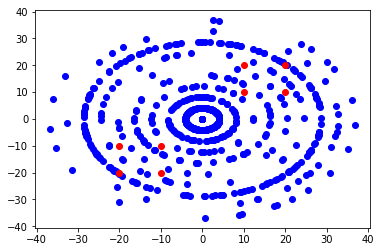

In [65]:
equis= np.array(xs)
ies=np.array(ys)
limX=list()
limY=list()
for ar in areas_input:
    for limi in ar.getLimites():
        limX.append(float(limi.getX()))
        limY.append(float(limi.getY()))
plt.scatter(equis,ies, color='blue')#,angulos)
plt.scatter(np.array(limX),np.array(limY), color='red')
plt.show()

In [66]:
message = [bytes([2]),chr(48),chr(48),chr(48),chr(69),chr(65),chr(82),chr(48),chr(49),binascii.unhexlify(b"9B"),binascii.unhexlify(b"B1"),bytes([3])]
message 
b = bytearray()
b.extend(map(ord, message))
b

bytearray(b'\x02000EAR01\x9b\xb1\x03')

In [67]:
for a in areas_input:
    print(a.hayObjeto(polares))

True
True
